In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import init_printing
from sympy import *
import math
import pandas as pd

## 1 Antmodel with extensivity property

### 1.1 non-extensive form

\begin{align}
\pi(n \rightarrow n-1) & = n\left(a+ \bar{b} \frac{(N-n)}{N}\right) \\
\pi \in [0,N]
\end{align}

In [ ]:
def antmodel_extensive(I, T, N, k_in, gamma, epsilon, steps):
    a = np.array([])
    for i in range(1, I):
        k = k_in
        k_all = []
        k_all.append(k)
        for t in range(1, T):
            p = np.random.uniform(0, N) #Wahrscheinlichkeit hier zw. 0 und 100
            p1 = k*(epsilon + (1-gamma)*((N-k)/N))
            if p1 > p:
            #if ((gamma*(k/N) + (1-gamma)*epsilon)/(gamma*(N/N) + (1-gamma)*1)) > 0.5:
                k = k - 1
                if k < 0: k = 0
            elif ((N-k)*(epsilon + (1-gamma)*(k/N))) + p1 > p > p1:
                k = k + 1
                if k > N: k = N
            else:
                k = k
            if t%steps == 1: 
                k_all.append(k)  # use of modulo operator % to write just every 5th k in a list
        if i == 1: a = np.array([k_all])
        else: a = np.append(a, [k_all], axis=0)
    return a

In [28]:
ants = 100 # sum of all agents
time = 60000 # number of timesteps
ants1 = 50 # sum of agents at food source 1 in t=0
sim = 3 # number of simulations
#herding = 0.3 # strength of herding behaviour
#ownprob = 0.15
stepsize = 100

herding = 0.01 # strength of herding behaviour
ownprob = 0.005

ext1 = antmodel_extensive(sim, time, ants, ants1, herding, ownprob, stepsize)
[np.mean(ext1[1]), np.var(ext1[1])]

[24.643926788685523, 655.5071552958049]

In [29]:
data = []
for i in range(0, sim-1):
    row = []
    row.append(np.mean(ext1[i]))
    row.append(np.var(ext1[i]))
    data.append(row)  

pd.DataFrame(data, columns=["Mean", "Variance"])

,Mean,Variance
0,43.306156,1062.159180
1,24.643927,655.507155
2,35.705491,794.889970
3,57.871880,963.888743


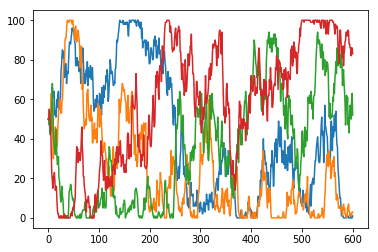

In [30]:
for i in range(1, sim):
    plt.plot(ext1[i-1])

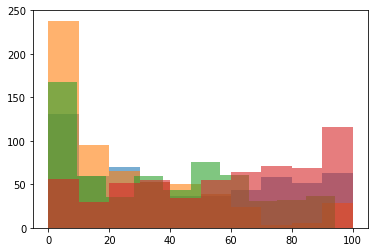

In [31]:
for i in range(1, sim):
    plt.hist(ext1[i-1], alpha = 0.6)

### 1.2 Extensive form

\begin{align}
\pi(n \rightarrow n-1) & = \frac{n}{N}\left(a+ \bar{b} \frac{(N-n)}{N}\right) \\
\pi \in [0,1]
\end{align}

In [54]:
def antmodel_kirman(I, T, N, k_in, gamma, epsilon, steps):
    a = np.array([])
    for i in range(1, I):
        k = k_in
        k_all = []
        k_all.append(k/N)
        for t in range(1, T):
            p = np.random.uniform(0, 1)
            p1 = ((k/N)*(epsilon + (1-gamma)*((N-k)/(N-1))))
            if p1 > p:
            #if ((gamma*(k/N) + (1-gamma)*epsilon)/(gamma*(N/N) + (1-gamma)*1)) > 0.5:
                k = k - 1
                #if k < 0: k = 0
            elif ((1-(k/N))*(epsilon + (1-gamma)*(k/(N-1)))) + p1 > p > p1:
                k = k + 1
                #if k > N: k = N
            else:
                k = k
            if t%steps == 1: 
                k_all.append(k/N)  # use of modulo operator % to write just every 5th k in a list
        if i == 1: a = np.array([k_all])
        else: a = np.append(a, [k_all], axis=0)
    return a

In [55]:
#### 100 agents, a = 0.3, b = 1 - 0.15

In [56]:
ants = 100 # sum of all agents
time = 60000 # number of timesteps
ants1 = 50 # sum of agents at food source 1 in t=0
sim = 4 # number of simulations
herding = 0.15 # strength of herding behaviour
ownprob = 0.3
stepsize = 100

timeseries1 = antmodel_kirman(sim, time, ants, ants1, herding, ownprob, stepsize)

In [57]:
timeseries1.shape

(3, 601)

In [58]:
#https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook
data = []
for i in range(0, sim-1):
    row = []
    row.append(np.mean(timeseries1[i]))
    row.append(np.var(timeseries1[i]))
    data.append(row)  

pd.DataFrame(data, columns=["Mean", "Variance"])

,Mean,Variance
0,0.503544,0.006007
1,0.507055,0.006151
2,0.499551,0.005637


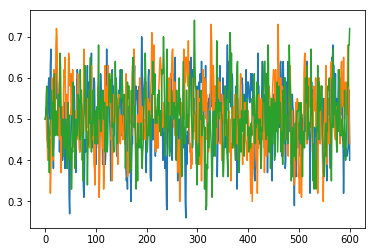

In [59]:
for i in range(1, sim):
    plt.plot(timeseries1[i-1])

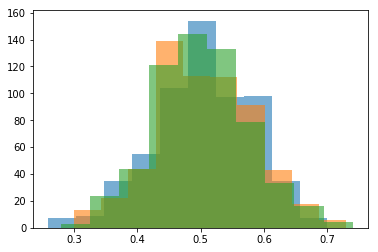

In [60]:
for i in range(1, sim):
    plt.hist(timeseries1[i-1], alpha = 0.6)

### strong interaction

In [33]:
ants = 100 # sum of all agents
time = 3000000 # number of timesteps
ants1 = 50 # sum of agents at food source 1 in t=0
sim = 5 # number of simulations
herding = 0.01 # strength of herding behaviour
ownprob = 0.005
stepsize = 5

timeseries2 = antmodel_kirman(sim, time, ants, ants1, herding, ownprob, stepsize)
[np.mean(timeseries2[1]), np.var(timeseries2[1])]

[45.400342666095554, 1217.9216622798085]

In [34]:
data = []
for i in range(0, sim-1):
    row = []
    row.append(np.mean(timeseries2[i]))
    row.append(np.var(timeseries2[i]))
    data.append(row)  

pd.DataFrame(data, columns=["Mean", "Variance"])

,Mean,Variance
0,46.903783,1252.832828
1,45.400343,1217.921662
2,52.195400,1241.890869
3,50.398471,1236.134522


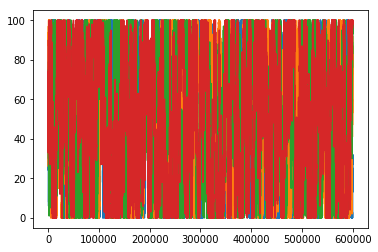

In [35]:
for i in range(1, sim):
    plt.plot(timeseries2[i-1])

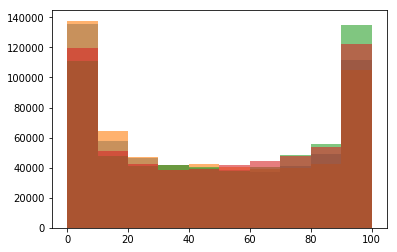

In [36]:
for i in range(1, sim):
    plt.hist(timeseries2[i-1], alpha = 0.6)

### no interaction

In [138]:
ants = 100 # sum of all agents
time = 600000 # number of timesteps
ants1 = 50 # sum of agents at food source 1 in t=0
sim = 5 # number of simulations
herding = 0.3 # strength of herding behaviour
ownprob = 0.15
stepsize = 100

timeseries3 = antmodel_kirman(sim, time, ants, ants1, herding, ownprob, stepsize)
[np.mean(timeseries3[1]), np.var(timeseries3[1])]

[50.12181303116147, 81.01715625299465]

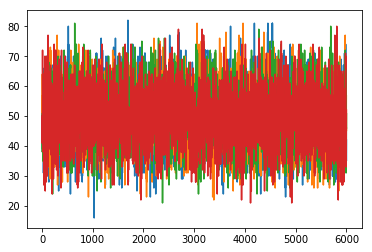

In [139]:
for i in range(1, sim):
    plt.plot(timeseries3[i-1])

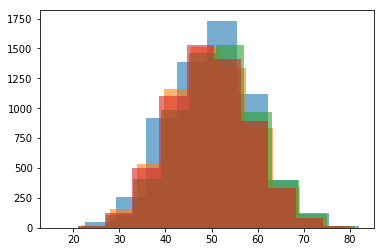

In [140]:
for i in range(1, sim):
    plt.hist(timeseries3[i-1], alpha = 0.6)

## 2 Antmodel without extensivity property

\begin{align}
\pi(n \rightarrow n-1) & = n(a+ \bar{b} (N-n)) \\
in intensive form:
\pi(x \rightarrow x-\frac{2}{N}) & = (1+x)(2\frac{a}{N}+ \bar{b} (1-x)) \\
with:
x = \frac{2n}{N -1}
\end{align}

In [133]:
def antmodel_noextensivep(I, T, N, k_in, gamma, epsilon, steps):
    a = np.array([])
    tt = []
    for i in range(1, I):
        k = k_in
        x = k/N
        k_all = []
        k_all.append(x)
        for t in range(1, T):
            p = np.random.uniform(0, 1)
            #p1 = k*(epsilon + (1-gamma)*(N-k))
            #p1 = (1+((2*k/(N-1)))*(2*epsilon/N + (1-gamma)*(1-((2*k/(N-1))))))
            p1 = (1+x)*(2*epsilon/N + (1-gamma)*(1-x))
            # Wahrscheinlichkeit zw 0 und 1
            tt.append(p1)
            if p1 > p:
            #if ((gamma*(k/N) + (1-gamma)*epsilon)/(gamma*(N/N) + (1-gamma)*1)) > 0.5:
                x = x - (2/N)
                #if k < 0: k = 0
            #elif ((N-k)*(epsilon + (1-gamma)*k)) + p1 > p > p1:
            elif (1-x)*(2*epsilon/N + (1-gamma)*(1+x)) + p1 > p > p1:
                x = x + (2/N)
                #if k > N: k = N
            else:
                x = x
            if t%steps == 1: 
                k_all.append(x)  # use of modulo operator % to write just every 5th k in a list
        if i == 1: a = np.array([k_all])
        else: a = np.append(a, [k_all], axis=0)
    return a

#### 100 agents, a = 0.3, b = 1 - 0.15

In [134]:
ants = 100 # sum of all agents
time = 60000 # number of timesteps
ants1 = 1 # sum of agents at food source 1 in t=0
sim = 4 # number of simulations
herding = 0.3 # strength of herding behaviour
ownprob = 0.15
stepsize = 100

noextp = antmodel_noextensivep(sim, time, ants, ants1, herding, ownprob, stepsize)
[np.mean(noextp), np.var(noextp)]

[-0.9905990016638936, 0.009898698324017201]

In [135]:
#analytic derived variance
varx = 1/(4*(((2*ownprob*ants/(1-herding)))+1))
varx

0.005700325732899022

In [136]:
noextp

array([[ 0.01,  0.03, -0.45, ..., -1.01, -1.01, -1.01],
       [ 0.01, -0.01, -0.29, ..., -1.01, -1.01, -1.01],
       [ 0.01, -0.01, -0.45, ..., -1.01, -1.01, -1.01]])

In [137]:
data = []
for i in range(0, sim-1):
    row = []
    row.append(np.mean(noextp[i]))
    row.append(np.var(noextp[i]))
    data.append(row)  

pd.DataFrame(data, columns=["Mean", "Variance"])

,Mean,Variance
0,-0.998286,0.007152
1,-0.985541,0.012595
2,-0.987970,0.009857


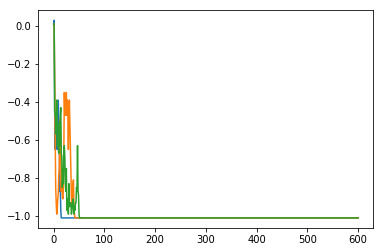

In [138]:
for i in range(1, sim):
    plt.plot(noextp[i-1])

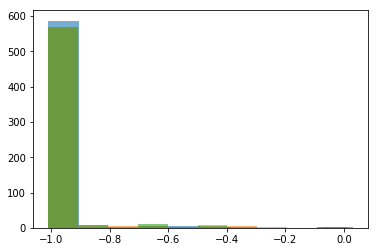

In [139]:
for i in range(1, sim):
    plt.hist(noextp[i-1], alpha = 0.6)

#### 100000 agents, a = 0.3, b = 1 - 0.15

In [50]:
ants = 100000 # sum of all agents
time = 60000 # number of timesteps
ants1 = 50000 # sum of agents at food source 1 in t=0
sim = 4 # number of simulations
herding = 0.3 # strength of herding behaviour
ownprob = 0.15
stepsize = 100

noextp1 = antmodel_noextensivep(sim, time, ants, ants1, herding, ownprob, stepsize)
[np.mean(noextp1[1]), np.var(noextp1[1])]

[0.5005217304492512, 1.6355707210112767e-07]

In [51]:
data = []
for i in range(0, sim-1):
    row = []
    row.append(np.mean(noextp1[i]))
    row.append(np.var(noextp1[i]))
    data.append(row)  

pd.DataFrame(data, columns=["Mean", "Variance"])

,Mean,Variance
0,0.499465,1.782832e-07
1,0.500522,1.635571e-07
2,0.498345,6.778122e-07


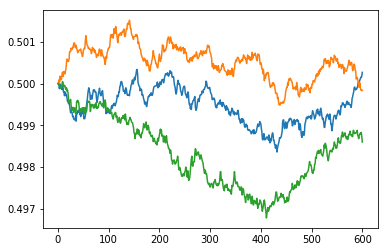

In [52]:
for i in range(1, sim):
    plt.plot(noextp1[i-1])

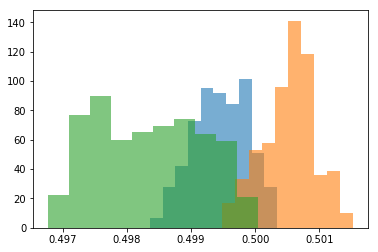

In [53]:
for i in range(1, sim):
    plt.hist(noextp1[i-1], alpha = 0.6)